In [1]:
# run in computer environment gis3
import xarray as xr
import numpy as np
from xarray.backends import NetCDF4DataStore
import salem
from datetime import datetime
from siphon.catalog import TDSCatalog
import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.mpl.ticker import LongitudeFormatter,LatitudeFormatter
from cartopy.io.shapereader import Reader, natural_earth
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import geopandas

In [ ]:
var = ['T2','LAI','SMOIS','GRDFLX','']

In [15]:
control1 = xr.open_dataset('/mnt/e/wrf_tibet/output/control/wrfout_control_monthly_2006-01-01')
control2 = xr.open_dataset('/mnt/e/wrf_tibet/output/control/wrfout_control_monthly_2006-05-06')
control3 = xr.open_dataset('/mnt/e/wrf_tibet/output/control/wrfout_control_monthly_2006-09-08')
control4 = xr.open_dataset('/mnt/e/wrf_tibet/output/control/wrfout_control_monthly_2007-01-11')
control5 = xr.open_dataset('/mnt/e/wrf_tibet/output/control/wrfout_control_monthly_2007-05-16')
control6 = xr.open_dataset('/mnt/e/wrf_tibet/output/control/wrfout_control_monthly_2007-09-18')

In [35]:
rm_grass5 = xr.open_dataset('/mnt/e/wrf_tibet/output/rm_grass/wrfout_rm_grass_monthly_2007-05-16')

In [50]:
rm_forest5 = xr.open_dataset('/mnt/e/wrf_tibet/output/rm_forest//wrfout_rm_forest_monthly_2007-05-16')

In [41]:
t2_control = (control5.T2.sel(XTIME = '2007-06')[0]+ control5.T2.sel(XTIME = '2007-07')[0]+ control5.T2.sel(XTIME = '2007-08')[0])/3
t2_rm_grass = (rm_grass5.T2.sel(XTIME = '2007-06')[0]+ rm_grass5.T2.sel(XTIME = '2007-07')[0]+ rm_grass5.T2.sel(XTIME = '2007-08')[0])/3


In [51]:
t2_rm_forest = (rm_forest5.T2.sel(XTIME = '2007-06')[0]+ rm_forest5.T2.sel(XTIME = '2007-07')[0]+ rm_forest5.T2.sel(XTIME = '2007-08')[0])/3


In [56]:
lai_control = (control5.LAI.sel(XTIME = '2007-06')[0]+ control5.LAI.sel(XTIME = '2007-07')[0]+ control5.LAI.sel(XTIME = '2007-08')[0])/3
lai_rm_grass = (rm_grass5.LAI.sel(XTIME = '2007-06')[0]+ rm_grass5.LAI.sel(XTIME = '2007-07')[0]+ rm_grass5.LAI.sel(XTIME = '2007-08')[0])/3


In [ ]:
pre_control = (control5.LAI.sel(XTIME = '2007-06')[0]+ control5.LAI.sel(XTIME = '2007-07')[0]+ control5.LAI.sel(XTIME = '2007-08')[0])/3
pre_rm_grass = (rm_grass5.LAI.sel(XTIME = '2007-06')[0]+ rm_grass5.LAI.sel(XTIME = '2007-07')[0]+ rm_grass5.LAI.sel(XTIME = '2007-08')[0])/3


In [59]:
sm_control = (control5.SMOIS.sel(XTIME = '2007-06')[0]+ control5.SMOIS.sel(XTIME = '2007-07')[0]+ control5.SMOIS.sel(XTIME = '2007-08')[0])/3
sm_rm_grass = (rm_grass5.SMOIS.sel(XTIME = '2007-06')[0]+ rm_grass5.SMOIS.sel(XTIME = '2007-07')[0]+ rm_grass5.SMOIS.sel(XTIME = '2007-08')[0])/3


In [80]:
pre_control = control5.RAINNC.sel(XTIME = '2007-08')[0] - control5.RAINNC.sel(XTIME = '2007-06')[0]
pre_rm_grass = rm_grass5.RAINNC.sel(XTIME = '2007-08')[0] - rm_grass5.RAINNC.sel(XTIME = '2007-06')[0]

In [122]:
control1['SHB']

<xarray.DataArray 'SHB' (XTIME: 5, y: 171, x: 231)>
[197505 values with dtype=float32]
Coordinates:
    lon      (y, x) float32 82.610504 82.83075 83.05139 ... 161.2799 161.61536
    lat      (y, x) float32 8.361839 8.439087 8.515778 ... 48.310043 48.142765
  * XTIME    (XTIME) datetime64[ns] 2006-01-16T10:30:00 ... 2006-05-03T10:30:00
Dimensions without coordinates: y, x
Attributes:
    units:        W/m2
    FieldType:    104
    MemoryOrder:  XY 
    description:  sensible heat flux: bare grnd to atmo
    stagger:

In [119]:
control1['T']

<xarray.DataArray 'TH2' (XTIME: 5, y: 171, x: 231)>
[197505 values with dtype=float32]
Coordinates:
    lon      (y, x) float32 82.610504 82.83075 83.05139 ... 161.2799 161.61536
    lat      (y, x) float32 8.361839 8.439087 8.515778 ... 48.310043 48.142765
  * XTIME    (XTIME) datetime64[ns] 2006-01-16T10:30:00 ... 2006-05-03T10:30:00
Dimensions without coordinates: y, x
Attributes:
    units:        K
    FieldType:    104
    MemoryOrder:  XY 
    description:  POT TEMP at 2 M
    stagger:

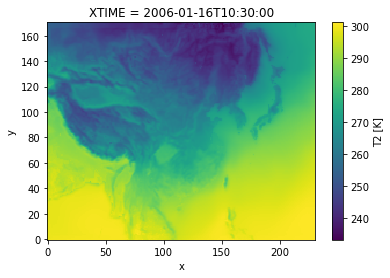

In [107]:
control1['T2'][0].plot()

In [81]:
t2_effect = t2_rm_grass - t2_control
lai_effect = lai_rm_grass - lai_control
sm_effect = sm_rm_grass - sm_control
pre_effext = (pre_rm_grass - pre_control)/3

In [53]:
t2_effect_rm_forest = t2_rm_forest - t2_control

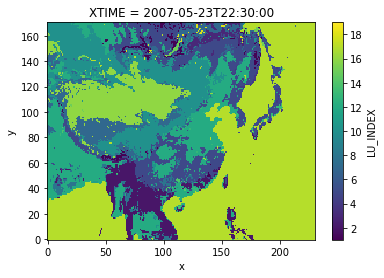

In [49]:
control5.LU_INDEX[0].plot()

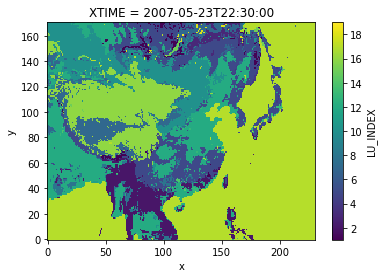

In [48]:
rm_grass5.LU_INDEX[0].plot()

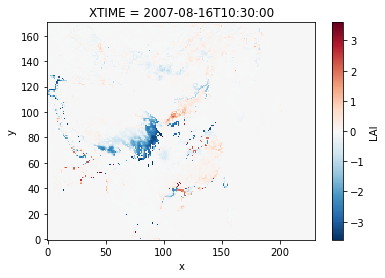

In [58]:
lai_effect.plot()

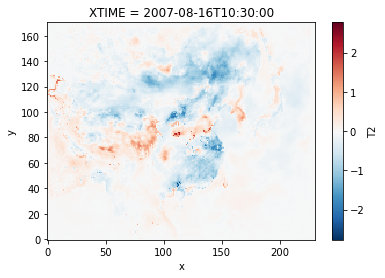

In [44]:
t2_effect.plot()

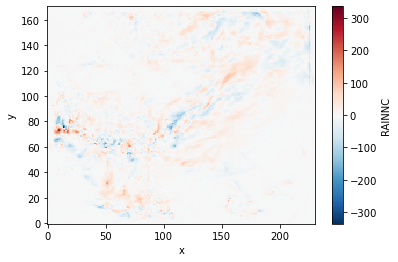

In [82]:
pre_effext.plot()

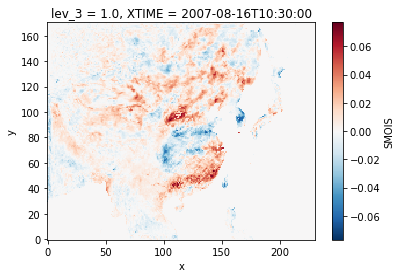

In [65]:
sm_effect[0].plot()

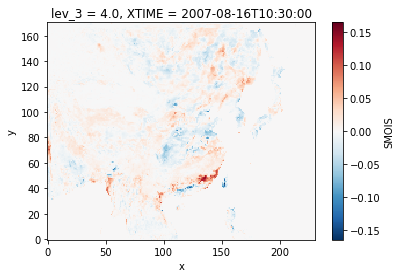

In [68]:
sm_effect[3].plot()

In [40]:
rm_grass5.T2.sel(XTIME = '2007-06')

<xarray.DataArray 'T2' (XTIME: 1, y: 171, x: 231)>
array([[[301.44543, 301.44257, ..., 301.28094, 301.28778],
        [301.4003 , 301.30945, ..., 301.2316 , 301.296  ],
        ...,
        [295.2292 , 295.4717 , ..., 278.8471 , 279.01642],
        [294.77917, 294.35907, ..., 278.93005, 278.98892]]], dtype=float32)
Coordinates:
    lon      (y, x) float32 ...
    lat      (y, x) float32 ...
  * XTIME    (XTIME) datetime64[ns] 2007-06-15T22:30:00
Dimensions without coordinates: y, x
Attributes:
    units:        K
    FieldType:    104
    MemoryOrder:  XY 
    description:  TEMP at 2 M
    stagger:

In [33]:
lai[0]

<xarray.DataArray 'LAI' (y: 171, x: 231)>
array([[  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       ...,
       [ 78.848206,  91.48547 , 151.17563 , ...,   0.      ,   0.      ,
          0.      ],
       [ 71.161095, 121.11473 , 165.4838  , ...,   0.      ,   0.      ,
          0.      ],
       [ 79.51238 ,  87.42785 ,  92.00552 , ...,   0.      ,   0.      ,
          0.      ]], dtype=float32)
Coordinates:
    lon      (y, x) float32 82.610504 82.83075 83.05139 ... 161.2799 161.61536
    lat      (y, x) float32 8.361839 8.439087 8.515778 ... 48.310043 48.142765
    XTIME    datetime64[ns] 2007-09-09T10:30:00
Dimensions without coordinates: y, x

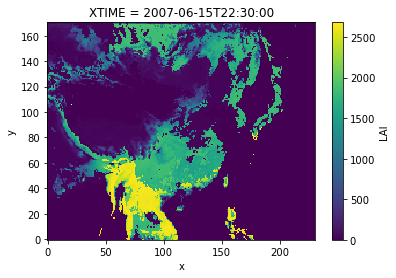

In [34]:
lai = control5.LAI.sel(XTIME='2007-06')*500
lai.plot()

In [83]:
geo = xr.open_dataset('/mnt/e/wrf_tibet/output/geo.nc')

In [88]:
rm_grass=xr.open_dataset('/mnt/e/wrf_tibet/output/gem_em_d01_rm_grass.nc')

In [91]:
rm_forest = xr.open_dataset('/mnt/e/wrf_tibet/output/gem_em_d01_rm_forest.nc')

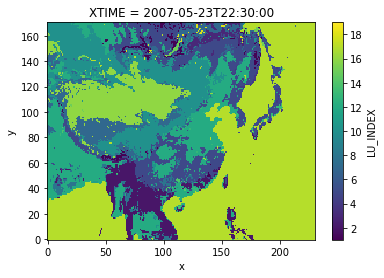

In [87]:
control5.LU_INDEX[0].plot()

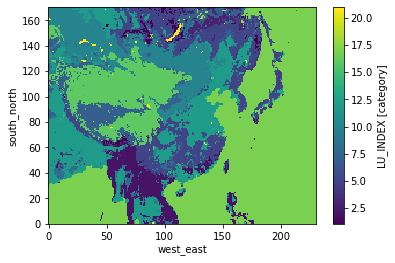

In [89]:
rm_grass.LU_INDEX[0].plot()

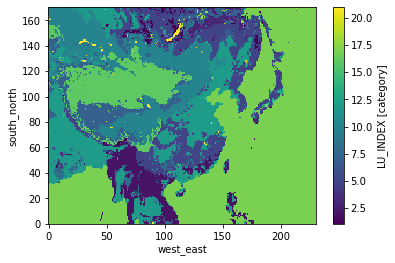

In [92]:
rm_forest.LU_INDEX[0].plot()

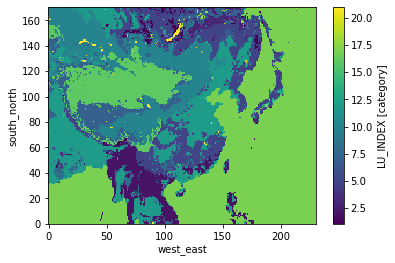

In [86]:
geo.LU_INDEX[0].plot()

In [96]:
rm_grass.LU_INDEX

<xarray.DataArray 'LU_INDEX' (Time: 1, south_north: 171, west_east: 231)>
array([[[17., 17., ..., 17., 17.],
        [17., 17., ..., 17., 17.],
        ...,
        [10., 10., ..., 17., 17.],
        [10., 10., ..., 17., 17.]]], dtype=float32)
Dimensions without coordinates: Time, south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    units:        category
    description:  Dominant category
    stagger:      M
    sr_x:         1
    sr_y:         1